<a href="https://colab.research.google.com/github/medha130101/Minor_Project/blob/main/FERBasicFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline

import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
#from livelossplot import PlotLossesKeras
# from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.7.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load the Dataset from the ZIP File

In [3]:
!pip install livelossplot

In [4]:
 print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [5]:
! rm -rf train; mkdir train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/emotion.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/facesdb.zip' -d train
! unzip -q '/content/drive/My Drive/cs230 project/cs230-fer-master/datasets/fer2013/train.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/googlesearch.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/googleset.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/jaffe.zip' -d train
#! unzip -q '/content/drive/My Drive/cs230 project/dataset/umea.zip' -d train

In [6]:
! rm -rf dev; mkdir dev
! unzip -q '/content/drive/My Drive/cs230 project/cs230-fer-master/datasets/fer2013/test-public.zip' -d dev
! rm -rf test; mkdir test
! unzip -q '/content/drive/My Drive/cs230 project/cs230-fer-master/datasets/fer2013/test-private.zip' -d test

In [7]:
img_size = 48
batch_size = 64

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/train/train", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("/content/test/test-private", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [8]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


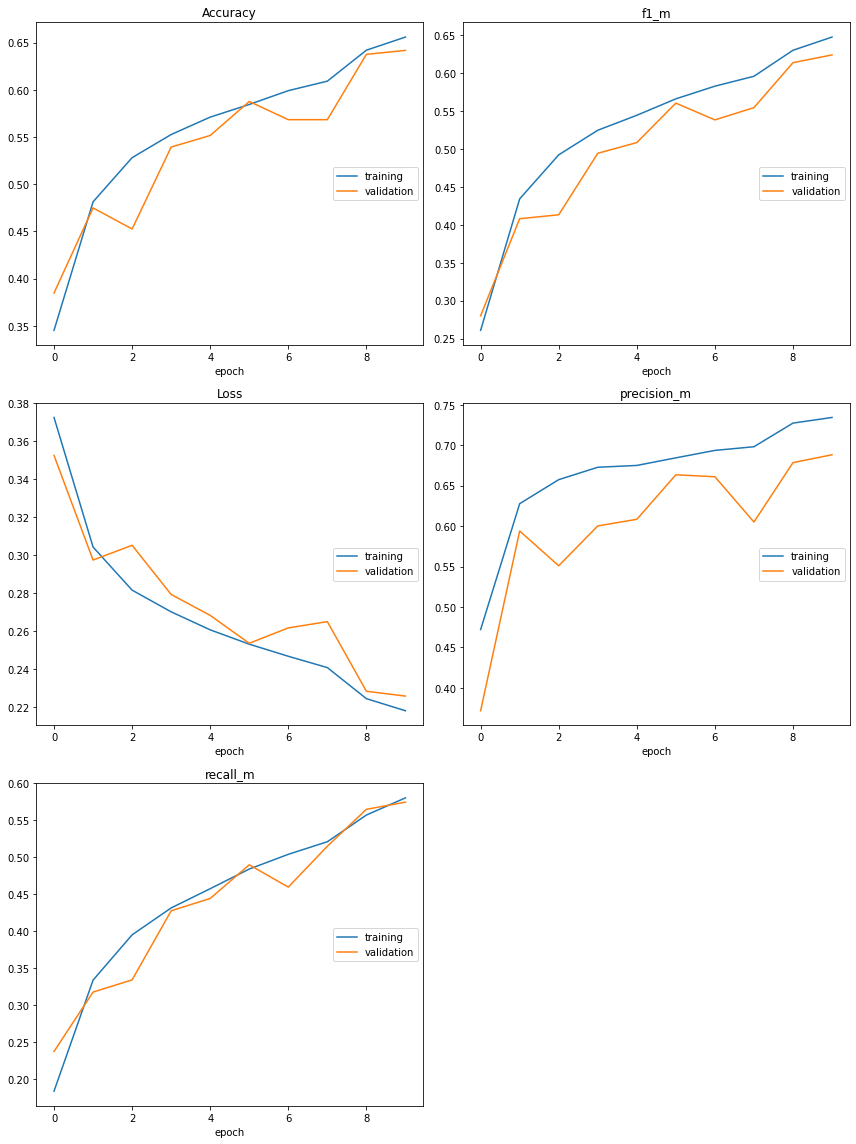

Accuracy
	training         	 (min:    0.345, max:    0.656, cur:    0.656)
	validation       	 (min:    0.385, max:    0.642, cur:    0.642)
f1_m
	training         	 (min:    0.261, max:    0.648, cur:    0.648)
	validation       	 (min:    0.280, max:    0.624, cur:    0.624)
Loss
	training         	 (min:    0.218, max:    0.372, cur:    0.218)
	validation       	 (min:    0.226, max:    0.352, cur:    0.226)
precision_m
	training         	 (min:    0.472, max:    0.734, cur:    0.734)
	validation       	 (min:    0.372, max:    0.688, cur:    0.688)
recall_m
	training         	 (min:    0.183, max:    0.580, cur:    0.580)
	validation       	 (min:    0.237, max:    0.574, cur:    0.574)

Epoch 00010: saving model to model_weights.h5
448/448 [==============================] - 29s 64ms/step - loss: 0.2180 - acc: 0.6559 - f1_m: 0.6476 - precision_m: 0.7343 - recall_m: 0.5803 - val_loss: 0.2257 - val_acc: 0.6417 - val_f1_m: 0.6240 - val_precision_m: 0.6882 - val_recall_m: 0.5745 - lr: 

In [9]:
from livelossplot import PlotLossesKeras
#from livelossplot import PlotLossesTensorFlowKeras
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

epochs = 10
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [PlotLossesKeras(), checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

In [10]:
print('\n# Evaluate on test data')
results_test = model.evaluate_generator(validation_generator)
print('test loss, test acc:', results_test)


# Evaluate on test data


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test loss, test acc: [0.22523356974124908, 0.6419615745544434, 0.6321069598197937, 0.6942386031150818, 0.5838815569877625]


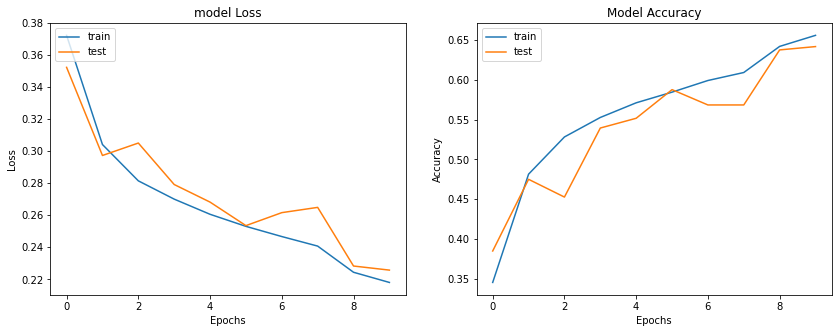

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion Matrix
[[ 515   45  345  989  845  783  473]
 [  55    6   35  121   91   80   48]
 [ 458   57  333 1047  902  790  510]
 [ 901   83  652 1808 1573 1417  781]
 [ 603   53  438 1304 1037  972  558]
 [ 573   50  408 1277  978  986  558]
 [ 377   30  268  781  737  590  388]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.13      0.14      3995
     disgust       0.02      0.01      0.02       436
        fear       0.13      0.08      0.10      4097
       happy       0.25      0.25      0.25      7215
     neutral       0.17      0.21      0.19      4965
         sad       0.18      0.20      0.19      4830
    surprise       0.12      0.12      0.12      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.18      0.17     28709



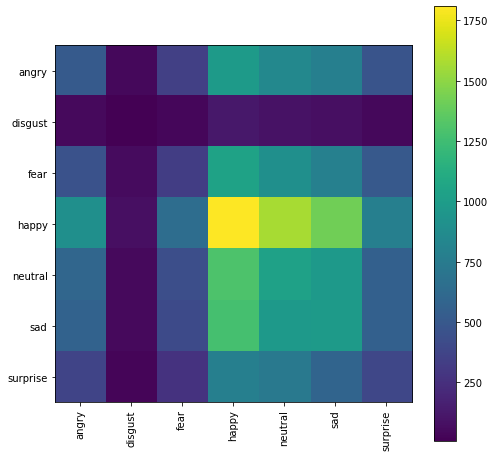

In [14]:
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = train_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Confusion Matrix
[[265   8  21  29  76  83   9]
 [ 12  25   4   3   0   8   3]
 [ 57   8 159  28  74 130  72]
 [  9   0  12 761  43  36  18]
 [ 20   2  16  35 440 108   5]
 [ 51   3  36  28 128 342   6]
 [  5   1  28  24  15  15 328]]
Classification Report
              precision    recall  f1-score   support

       angry       0.63      0.54      0.58       491
     disgust       0.53      0.45      0.49        55
        fear       0.58      0.30      0.40       528
       happy       0.84      0.87      0.85       879
     neutral       0.57      0.70      0.63       626
         sad       0.47      0.58      0.52       594
    surprise       0.74      0.79      0.77       416

    accuracy                           0.65      3589
   macro avg       0.62      0.60      0.60      3589
weighted avg       0.65      0.65      0.64      3589



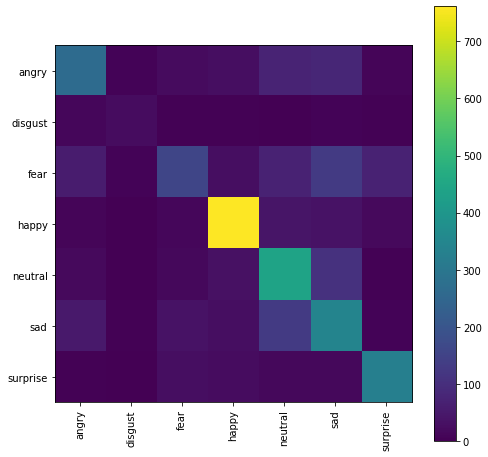

In [18]:
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

57/57 [==============================] - 2s 31ms/step - loss: 0.2248 - acc: 0.6464 - f1_m: 0.6350 - precision_m: 0.6983 - recall_m: 0.5858


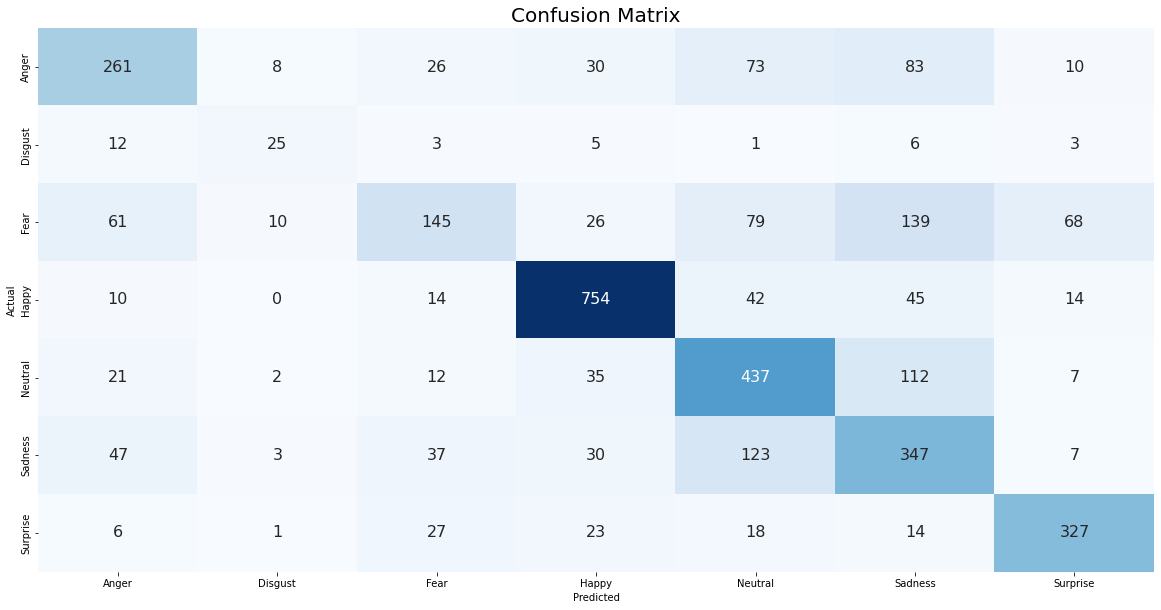

In [21]:
import seaborn as sns
import pandas as pd
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
CLASS_LABELS_EMOJIS = ["👿", "🤢" , "😱" , "😊" , "😐 ", "😔" , "😲" ]
model.evaluate(validation_generator)
preds = model.predict(validation_generator)
y_preds = np.argmax(preds , axis = 1 )
y_test = np.array(validation_generator.labels)
cm_data = confusion_matrix(y_test , y_preds)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')